In [5]:
#R > 1 → Clustering
#R < 1 → Regular spacing
#R ≈ 1 → Random distribution

In [13]:
import os
import pandas as pd
import numpy as np
from scipy.spatial import distance
import matplotlib.colors as mcolors

# File paths for input and output
input_dir = 'G:/Official_Vanda_Organizing/Spatial_Morphologic_Data/2_Data_Cleaning/3_Extracted_Maxima_and_Heights/Maxima_Points_CSVs'
output_dir = 'G:/Official_Vanda_Organizing/Spatial_Morphologic_Data/3_Statistics/Clarks_Evans_R_Index'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Function to calculate Clark's Evans R index for a given set of points
def clarks_evans_r_index(points):
    n = len(points)  # Number of points
    if n < 2:
        return np.nan  # Not enough points for calculation

    # Calculate pairwise distances
    dist_matrix = distance.cdist(points, points)
    np.fill_diagonal(dist_matrix, np.inf)  # Ignore self-distance
    nearest_neighbor_distances = np.min(dist_matrix, axis=1)  # Minimum distance to nearest neighbor for each point

    # Observed average nearest neighbor distance
    D_observed = np.mean(nearest_neighbor_distances)

    # Area of the convex hull (bounding area) of the points
    from scipy.spatial import ConvexHull
    hull = ConvexHull(points)
    A = hull.volume  # Area for 2D points, volume for 3D

    # Expected nearest neighbor distance for a random distribution
    D_expected = 1 / (2 * np.sqrt(n / A))

    # Clark's Evans R index
    R = D_observed / D_expected
    return R

# List to hold the results
results = []

# Process each CSV file in the input directory
for file_name in os.listdir(input_dir):
    if file_name.endswith('.csv'):
        file_path = os.path.join(input_dir, file_name)
        
        # Read CSV data
        data = pd.read_csv(file_path)
        
        # Ensure the CSV contains X and Y columns
        if 'X' not in data.columns or 'Y' not in data.columns:
            print(f"Skipping {file_name} because it does not contain X and Y columns.")
            continue
        
        # Get the X and Y coordinates
        points = data[['X', 'Y']].values

        # Calculate Clark's Evans R index for the current site
        R_index = clarks_evans_r_index(points)

        # Extract the site name from the file name (assumes the first two characters represent the site)
        site_name = file_name.split('_')[0]

        # Append the result for this site
        results.append([site_name, R_index])

        # Print the site name and Clark's Evans R index to the console
        print(f"Site: {site_name}, Clark's Evans R Index: {R_index}")

# Convert results into a DataFrame
results_df = pd.DataFrame(results, columns=['Site', 'Clarks_Evans_R_Index'])

# Save the results to a CSV file
output_file = os.path.join(output_dir, 'clarks_evans_r_index.csv')
results_df.to_csv(output_file, index=False)

Site: C10, Clark's Evans R Index: 1.2682109587948627
Site: C10, Clark's Evans R Index: 1.1900635669008213
Site: C11, Clark's Evans R Index: 1.1674882968794322
Site: C11, Clark's Evans R Index: 1.2061760168761095
Site: C12, Clark's Evans R Index: 1.3097393044459629
Site: C12, Clark's Evans R Index: 1.250435245460118
Site: C13, Clark's Evans R Index: 1.3471044879712073
Site: C1, Clark's Evans R Index: 1.2037653171106149
Site: C1, Clark's Evans R Index: 1.1926622063757053
Site: C2, Clark's Evans R Index: 1.139103566917432
Site: C2, Clark's Evans R Index: 1.2182517698065867
Site: C2, Clark's Evans R Index: 1.2076259753726748
Site: C3, Clark's Evans R Index: 0.9700994004462957
Site: C3, Clark's Evans R Index: 0.9937545006416609
Site: C4, Clark's Evans R Index: 1.1858061947348548
Site: C5, Clark's Evans R Index: 1.3831008220214576
Site: C7, Clark's Evans R Index: 1.261866268508343
Site: C7, Clark's Evans R Index: 1.2762871230777473
Site: C8, Clark's Evans R Index: 1.2620238004249114
Site: C8

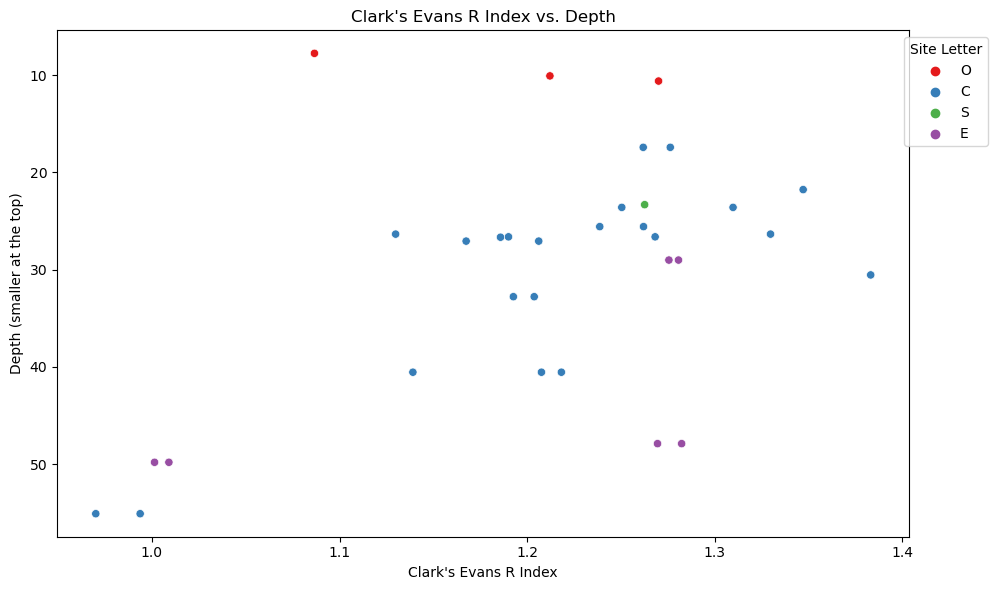

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV file into a pandas DataFrame
file_path = 'G:/Official_Vanda_Organizing/Spatial_Morphologic_Data/3_Statistics/Clarks_Evans_R_Index/clarks_evans_r_index.csv' 
df = pd.read_csv(file_path)

# Clean up column names (remove any extra spaces)
df.columns = df.columns.str.strip()

# Create a new column that holds the first letter of the site name
df['site_letter'] = df['Site'].str[0]

# Ensure the depth column is sorted from smallest to largest (depth increases from top to bottom)
df_sorted = df.sort_values(by='Depth', ascending=True)

# Create a color palette based on the site letters
palette = sns.color_palette("Set1", n_colors=df['site_letter'].nunique())

# Create a plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sorted, x='Clarks_Evans_R_Index', y='Depth', hue='site_letter', palette=palette)

# Set labels and title
plt.xlabel("Clark's Evans R Index")
plt.ylabel("Depth (smaller at the top)")
plt.title("Clark's Evans R Index vs. Depth")

# Show the plot
plt.gca().invert_yaxis()  # Invert the Y-axis to have smaller depths at the top
plt.legend(title="Site Letter", loc='upper right', bbox_to_anchor=(1.1, 1))
plt.tight_layout()
plt.show()


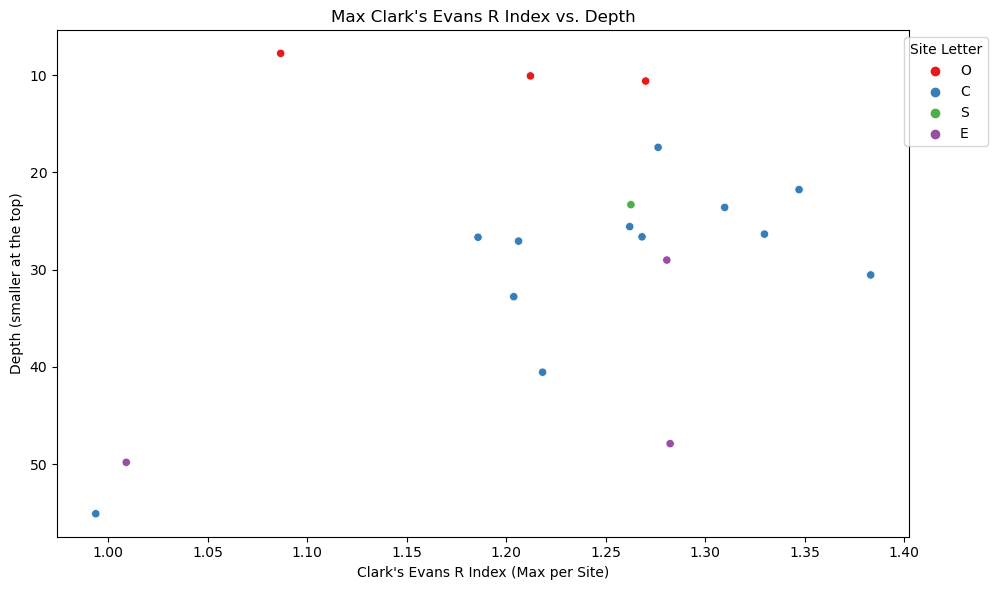

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV file into a pandas DataFrame
file_path = 'G:/Official_Vanda_Organizing/Spatial_Morphologic_Data/3_Statistics/Clarks_Evans_R_Index/clarks_evans_r_index.csv' 

df = pd.read_csv(file_path)

# Clean up column names (remove any extra spaces)
df.columns = df.columns.str.strip()

# Create a new column that holds the first letter of the site name
df['site_letter'] = df['Site'].str[0]

# Group by site and select the row with the maximum Clarks_Evans_R_Index for each site
df_max_index = df.loc[df.groupby('Site')['Clarks_Evans_R_Index'].idxmax()]

# Ensure the depth column is sorted from smallest to largest (depth increases from top to bottom)
df_max_index_sorted = df_max_index.sort_values(by='Depth', ascending=True)

# Create a color palette based on the site letters
palette = sns.color_palette("Set1", n_colors=df_max_index['site_letter'].nunique())

# Create a plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_max_index_sorted, x='Clarks_Evans_R_Index', y='Depth', hue='site_letter', palette=palette)

# Set labels and title
plt.xlabel("Clark's Evans R Index (Max per Site)")
plt.ylabel("Depth (smaller at the top)")
plt.title("Max Clark's Evans R Index vs. Depth")

# Show the plot
plt.gca().invert_yaxis()  # Invert the Y-axis to have smaller depths at the top
plt.legend(title="Site Letter", loc='upper right', bbox_to_anchor=(1.1, 1))
plt.tight_layout()
plt.show()

fig.savefig(output_file_path, bbox_inches='tight')
